<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 2 / NOTE 2*

---

# Boosting

## 🏆 학습목표
1. 대표적인 앙상블 기법인 Boosting 기법의 컨셉을 이해한다.
2. AdaBoost, Gradient Boosting 알고리즘을 이해한다.
3. XGBoost 라이브러리를 사용해 주요 하이퍼파라미터를 튜닝하고 모델을 학습한다.

## Warm up

### 배깅 복습
  - [Bootstrap aggregating bagging](https://youtu.be/2Mg8QD0F1dQ)

### 부스팅
  - [AdaBoost](https://youtu.be/LsK-xG1cLYA)
  - [Gradient Boosting](https://youtu.be/3CC4N4z3GJc)


### 📚 아래 라이브러리를 설치해 주세요.

#### 이번 모듈에서 추가적으로 사용하는 라이브러리는 다음과 같습니다. 설치를 확인해 주세요.
- [**xgboost**](https://xgboost.readthedocs.io/en/latest/index.html)

In [1]:
!pip3 install xgboost==1.7.2
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 3.4 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 2.0 MB/s eta 0:00:00


# 1. Bagging vs Boosting
- 앙상블 학습은 여러 기본 모델을 학습하고 모델들의 예측을 합하여 최종 예측을 내는 방식입니다.
- 단일 모델 사용 기법의 과적합, 과소적합 문제를 해결해 더 나은 일반화 성능을 제공하기 위해 굉장히 많이 사용됩니다.
- 앙상블 학습의 기본 컨셉은 성능이 뛰어나고 강력한 단일 모델을 구축하기 위해 노력하는 대신 약한 모델들을 학습하고 지혜롭게 조합하는 것입니다.
- 대표적인 앙상블 기법으로 Bagging과 Boosting이 있습니다.

## Bagging
![Bagging](https://itwiki.kr/images/f/f8/%EB%B0%B0%EA%B9%85%28Bagging%29.png)
- 좁은 의미에서 Bagging은 `복원추출 - 기본 모델(weak learner) 학습 - 기본 모델(weak learner)들의 예측값을 평등하게 합치기`의 과정을 말합니다.
- 넓은 의미에서 Bagging은 `기본 모델(weak learner)들을 병렬로 학습하고 평등하게 예측값을 합치는` 과정을 말합니다.
- Bagging의 핵심은 각 기본 모델(weak learner)들이 학습 시 상호 영향을 주고받지 않고 독립적, 병렬적으로 학습된다는 것입니다.
- 대표적으로 Random Forest 모델이 있습니다.


### Bagging은 모델의 분산을 줄여 [과적합을 피하도록 해 줍니다](https://scikit-learn.org/stable/auto_examples/ensemble/plot_bias_variance.html#sphx-glr-auto-examples-ensemble-plot-bias-variance-py).
- 여러 기본 모델(weak learner)들의 서로 다른 양상으로 발생하는 오차들이 상쇄되어 과적합을 피하는 원리입니다.
  
<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_bias_variance_001.png" width="500"  >

## Boosting
![Boosting](https://itwiki.kr/images/4/45/%EB%B6%80%EC%8A%A4%ED%8C%85%28Boosting%29.png)

- Boosting은 Bagging과 달리, 모델들이 순차적으로 학습됩니다. 지금까지 학습된 모델이 잘 예측하지 못하는 부분에 집중해서 다음 모델을 학습시킵니다.
- 대표적으로 AdaBoost, Gradient Boosting 모델이 있습니다.

### Boosting은 과정을 반복할수록 최종 모델의 복잡도를 상승시키며, 모델의 편향을 줄여 과소적합을 피하도록 해 줍니다.
- 모델들이 순차적으로 학습되는 과정에서 전체 모델은 점차 데이터의 세밀한 곳까지 꼼꼼히 볼 수 있게 되며, 최종 예측값은 점점 정확해집니다.


## Bagging vs Boosting

|    | Bagging | Boosting |
|:--:|:-------:|:--------:|
|**Weak Learner 학습**|각 모델이 독립적이고 병렬적으로 학습됨 | 이전 모델의 오류를 고려하여 다음 모델이 순차적으로 학습됨|
|**목적**|Variance 감소, 과적합 해결 | Bias 감소, 과소적합 해결 |
|**예시**| Random Forest | AdaBoost, Gradient Boosting|

# 2. AdaBoost, Gradient Boosting
- 대표적인 Boosting 알고리즘들입니다.

## AdaBoost
- AdaBoost는 초기에 개발된 Boosting 알고리즘입니다.
- 분류 문제에 적합한 알고리즘입니다. 하지만 Gradient Boosting보다 이상치에 민감하고 성능이 떨어져 자주 사용되지는 않습니다.

### AdaBoost는 각 단계별로 데이터셋으로부터 데이터를 샘플링하여 학습합니다.
- 다음 모델이 학습될 때, 이전 모델이 잘못 분류한 관측치가 샘플링될 확률을 높입니다.
- 결과적으로 모델들이 순차적으로 학습되며 이전 모델의 성능을 보완하는 양상으로 학습됩니다.


### AdaBoost 알고리즘을 살펴봅시다.
<img src="https://i.imgur.com/XzrlIjT.png" width="500"  />

##### Step 0. (Init) 모든 관측치에 대해 가중치를 동일하게 설정합니다.
- 가중치는 각 관측치들이 샘플링될 확률이 됩니다.

##### Step 1. (weak learner 학습) 관측치를 복원추출하여 weak learner $D_i$을 학습하고 +1, -1 분류를 진행합니다.

##### Step 2. (가중치 업데이트) 잘못 분류된 관측치에 가중치를 부여하여 다음 과정에서 샘플링이 더 잘 되도록 합니다.

##### Step 3. Step 1~2 과정을 n회 반복합니다.

##### Step 4. (최종 예측) weak learner들($D_1$, ..., $D_n$)을 결합하여 최종 예측을 수행합니다.
- 이때 각 weak learner들의 분류 성능에 따라 각 weak learner들의 예측치의 가중치를 다르게 주어 가중합합니다.


## Gradient Boosting
- Gradient Boosting은 회귀와 분류 문제에 모두 사용할 수 있는 알고리즘입니다.
- 매우 강력한 성능을 자랑하여 Kaggle이나 현업에서 인기가 높습니다. 
- 구현한 라이브러리도 많아 쉽게 모델을 구축할 수 있습니다.

### Gradient Boosting은 틀린 데이터에 집중하기 위해, 가중 샘플링을 하는 대신 잔차를 학습합니다.
<img src="https://i.imgur.com/iOFnWMl.png" width=700/>

- 다음 모델이 이전 모델의 잔차(Residual)를 학습하는 구조입니다. 이는 잔차가 큰 관측치를 더 학습하도록 하는 효과가 있으며, 이전 모델이 틀린 만큼을 직접 학습하며 이전 모델을 순차적으로 보완합니다.

### Gradient Boosting이 구현된 Python library들을 살펴봅시다.
- sklearn 외에 부스팅이 구현된 여러가지 라이브러리를 사용할 수 있습니다:
- [scikit-learn Gradient Tree Boosting](https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting) — 상대적으로 속도가 느릴 수 있습니다.
  - Anaconda: already installed
  - Google Colab: already installed
- [xgboost](https://xgboost.readthedocs.io/en/latest/) — 결측값을 수용하며, [monotonic constraints](https://xiaoxiaowang87.github.io/monotonicity_constraint/)를 강제할 수 있습니다.
  - Anaconda, Mac/Linux: `conda install -c conda-forge xgboost`
  - Windows: `conda install -c anaconda py-xgboost`
  - Google Colab: already installed
- [LightGBM](https://lightgbm.readthedocs.io/en/latest/) — 결측값을 수용하며, [monotonic constraints](https://blog.datadive.net/monotonicity-constraints-in-machine-learning/)를 강제할 수 있습니다.
  - Anaconda: `conda install -c conda-forge lightgbm`
  - Google Colab: already installed
- [CatBoost](https://catboost.ai/) — 결측값을 수용하며, [categorical features](https://catboost.ai/docs/concepts/algorithm-main-stages_cat-to-numberic.html)를 전처리 없이 사용할 수 있습니다.
  - Anaconda: `conda install -c conda-forge catboost`
  - Google Colab: `pip install catboost`

##### 참고: monotonic constraints
<img src="https://raw.githubusercontent.com/dmlc/web-data/master/xgboost/monotonic/two.feature.no.constraint.png" width="700" />

<br>
<img src="https://raw.githubusercontent.com/dmlc/web-data/master/xgboost/monotonic/two.feature.with.constraint.png" width="700" />


# 3. XGBoost 사용하기
- XGBoost 라이브러리는 2014년에 공개된 Gradient Boosting Decision Tree 구현 라이브러리로, Kaggle 등에서 꾸준히 사랑받아 온 모델입니다.
- scikit-learn ensemble 모듈의 GradientBoostingRegressor, GradientBoostingClassifier 클래스도 Gradient Boosting Decision Tree 기반 모델이지만, 성능과 계산 속도가 XGBoost 모델보다 떨어져 자주 사용하지는 않습니다.

#### [XGBoost Python API Reference: Scikit-Learn API](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn)

### 💉 Case Study: H1N1 Vaccination Dataset
- Kaggle Competition에서 사용했던 H1N1 Vaccination 예측 Task를 예시로 XGBoost 라이브러리의 사용법을 알아봅시다.

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# 타겟을 정합니다.
target = "vacc_h1n1_f"

# 학습데이터 features, labels 를 병합합니다.
train = pd.merge(
    pd.read_csv(
        "https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train.csv"
    ),
    pd.read_csv(
        "https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train_labels.csv"
    )[target],
    left_index=True,
    right_index=True,
)
test = pd.read_csv(
    "https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/test.csv"
)

In [3]:
# 80/20 비율로 학습/테스트 데이터를 분리합니다.
train, val = train_test_split(
    train, train_size=0.80, test_size=0.20, stratify=train[target], random_state=2
)

In [4]:
# 어떤 특성이 있나요?
train.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_insurance',
       'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'agegrp',
       'education_comp', 'raceeth4_i', 'sex_i', 'inc_pov', 'marital',
       'rent_own_r', 'employment_status', 'census_region', 'census_msa',
       'n_adult_r', 'household_children', 'n_people_r', 'employment_industry',
       'employment_occupation', 'hhs_region', 'state', 'vacc_h1n1_f'],
      dtype='object')

In [5]:
# Feature Engineering을 수행합니다.
def engineer(df):
    # 새로운 특성을 생성합니다.
    behaviorals = [col for col in df.columns if "behavioral" in col]
    df["behaviorals"] = df[behaviorals].sum(axis=1)

    # 사용하지 않는 특성을 drop합니다.
    dels = [col for col in df.columns if ("employment" in col or "seas" in col)]
    df.drop(columns=dels, inplace=True)

    return df


train = engineer(train.copy())
val = engineer(val.copy())
test = engineer(test.copy())

In [6]:
# feature과 label을 분리합니다.
X_train, y_train = train.drop(columns=target), train[target]
X_val, y_val = val.drop(columns=target), val[target]
X_test = test

### Gradient Boosting Decision Tree는 Tree-based 모델의 특성을 그대로 따릅니다.
- 특성을 수치화할 필요가 있습니다(catboost 등에서는 string type의 특성을 그대로 처리하기도 합니다).
- 특성의 scaling이나 normalization이 필요없습니다.
- one-hot encoding보다 ordinal encoding이 선호됩니다.
  - 특히 cardinality가 높은 특성의 경우 one-hot encoding 사용 시 학습 시간 및 메모리, 컴퓨팅 자원이 많이 소모되므로 주의하세요.

### XGBoost의 몇 가지 파라미터에 대해 알아봅시다.

#### `booster`
- weak learner 모델을 설정할 수 있는 파라미터입니다.
- `gbtree`: Decision Tree 모델을 사용합니다.
- `dart`: Decision Tree 모델을 사용하되, DART 알고리즘을 사용하여 모델을 정규화합니다. 
  - 과적합을 방지하기 위해 이전에 학습된 트리 중 몇 가지를 drop시키는 기법입니다.
  - 관련 정보는 [여기](https://xgboost.readthedocs.io/en/latest/tutorials/dart.html)를 참조하세요.
-  `gblinear`: 선형 모델을 사용합니다. 표현력이 제한적이어서 잘 사용되지 않습니다.

#### `objective`
- 최소화하고자 하는 목적함수를 설정할 수 있습니다.
- 설정하지 않을 경우, 분류 / 회귀 Task에 따라 설정된 기본값으로 설정됩니다(`XGBClassifier`:  `binary:logistic`, `XGBRegressor`:  `reg:squarederror`,).
- `reg:squarederror`: MSE를 최소화하여 회귀 문제를 해결합니다.
- `reg:logistic`: Logistic 회귀 문제를 해결합니다.
- `binary:logistic`: Logistic 이진분류 문제를 해결합니다.
- 이 외에도 다양한 objective를 지원합니다. [여기](https://xgboost.readthedocs.io/en/latest/parameter.html#learning-task-parameters)를 참조하세요.


#### `eval_metric`
- 검증 데이터를 같이 넣어줄 경우, 검증 방법을 설정할 수 있습니다.
- 설정하지 않을 경우 `objective`에 따라 설정된 기본 `eval_metric`으로 설정됩니다(`regression`: `rmse`, `classification`: `logloss`).

In [7]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline


pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="median"),
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",  # error = 1 - accuracy 지표를 사용해 평가합니다.
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
        max_depth=7,
        learning_rate=0.1,
    ),
)
print(pipe)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='error',
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=n

In [8]:
# 모델을 학습합니다.
pipe.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['opinion_h1n1_vacc_effective',
                                      'opinion_h1n1_risk',
                                      'opinion_h1n1_sick_from_vacc', 'agegrp',
                                      'census_msa', 'state'],
                                mapping=[{'col': 'opinion_h1n1_vacc_effective',
                                          'data_type': dtype('O'),
                                          'mapping': Somewhat Effective      1
Not Very Effective      2
Very Effective          3
Not At All Effective    4
Dont Know               5
NaN                     6
Refused                 7
dtype: int64},
                                         {'co...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', learning_rate=0.1,
                       

In [9]:
from sklearn.metrics import classification_report

# train 학습, 검증셋 정확도
print("검증 정확도", pipe.score(X_val, y_val))

y_pred = pipe.predict(X_val)
print(classification_report(y_val, y_pred))

검증 정확도 0.8160360574071878
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      6416
           1       0.66      0.49      0.56      2015

    accuracy                           0.82      8431
   macro avg       0.75      0.70      0.72      8431
weighted avg       0.80      0.82      0.81      8431



In [ ]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import make_pipeline


pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="median"),
    AdaBoostClassifier(
        n_estimators=200,
        learning_rate=0.1,
    ),
)
print(pipe)

In [ ]:
# 모델을 학습합니다.
pipe.fit(X_train, y_train)

In [14]:
from sklearn.metrics import classification_report

# train 학습, 검증셋 정확도
print("검증 정확도", pipe.score(X_val, y_val))

y_pred = pipe.predict(X_val)
print(classification_report(y_val, y_pred))

검증 정확도 0.8127149804293679
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      6416
           1       0.66      0.44      0.53      2015

    accuracy                           0.81      8431
   macro avg       0.75      0.68      0.71      8431
weighted avg       0.80      0.81      0.80      8431



### GBDT(XGBoost)의 주요 하이퍼파라미터에 대해 살펴봅시다.

- `n_estimators`
  - weak learner들의 수를 결정합니다.
- `learning_rate`
  - 단계별로 weak learner들을 얼마나 반영할지 결정합니다.
  - 0~1의 범위를 갖습니다
    - 값이 너무 크면 과적합이 발생하기 쉽습니다.
    - 값이 너무 작으면 학습이 느려집니다.
  - 일반적으로 0.05 ~ 0.3 정도의 범위에서 탐색을 진행합니다.
- `max_depth`
  - 각 weak learner 트리들의 최대 깊이를 결정합니다.
  - 모델의 성능에 가장 큰 영향을 주는 변수입니다.
  - 0 ~ ∞의 범위를 갖습니다.
    - -1으로 설정 시 깊이의 제한이 없습니다.
    - 값이 너무 크면 과적합이 발생하기 쉬우며 메모리 사용량이 늘어납니다.
  - 일반적으로 5 ~ 12 정도의 범위에서 탐색을 진행합니다.
- `min_child_weight` 
  - leaf 노드에 포함되는 관측치의 수를 결정합니다.
  - 0 ~ ∞의 범위를 갖습니다.
    - 값이 커질수록 weak learner들의 복잡도가 감소합니다.
  - 일반적으로 과적합 발생 시 1, 2, 4, 8...와 같이 값을 2배씩 늘려 성능을 확인합니다.
- `subsample`
  - 각 weak learner들을 학습할 때 과적합을 막고 일반화 성능을 올리기 위해 전체 데이터 중 일부를 샘플링하여 학습합니다.
  - subsample 파라미터가 데이터(row)를 샘플링할 비율을 결정합니다.
  - 0 ~ 1의 범위를 갖습니다.
  - 일반적으로 0.8 정도로 설정하며, 데이터의 크기에 따라 달라질 수 있습니다.
- `colsample_bytree`
  - 각 weak learner들을 학습할 때 과적합을 막고 일반화 성능을 올리기 위해 전체 column 중 일부를 샘플링하여 학습합니다.
  - `colsample_bytree` 파라미터가 column을 샘플링할 비율을 결정합니다.
  - 0 ~ 1의 범위를 갖습니다.
  - 일반적으로 0.8 정도로 설정하며, 특성의 갯수에 따라 달라질 수 있습니다. 특성이 천 개 이상으로 매우 많을 경우 0.1 등의 매우 작은 값을 설정하기도 합니다.
- `scale_pos_weight`
  - scikit-learn의 class_weight와 동일한 기능입니다. 
  - `sum(negative cases)` / `sum(positive cases)` 값을 넣어 주면 scikit-learn의 `balanced` 옵션과 동일하게 됩니다.
  - imbalanced target일 경우 적용을 고려합니다.
  


  
- 일반적으로 `max_depth`와 `learning_rate`가 가장 중요한 하이퍼파라미터로 다뤄지며, 과적합을 방지하기 위해 `subsample`, `colsample_bytree` 등의 값을 추가로 조정해 줍니다.
- 이 외에도 XGBoost는 굉장히 많은 하이퍼파라미터를 제공합니다. [여기](https://xgboost.readthedocs.io/en/latest/parameter.html#parameters-for-tree-booster)를 참조하세요.

In [ ]:
def get_pipeline(**kwargs):
    pipe = make_pipeline(
        OrdinalEncoder(),
        SimpleImputer(strategy="median"),
        XGBClassifier(
            objective="binary:logistic", eval_metric="error", random_state=42, **kwargs
        ),
    )
    return pipe

### `max_depth` 파라미터를 변경해 가며 일반화 성능을 확인해 봅시다.
- 과적합 발생 정도와 학습 시간 등을 주의깊게 살펴보세요.

In [ ]:
%%time
p_md2 = get_pipeline(n_estimators=100, max_depth=2, learning_rate=0.1)
p_md2.fit(X_train, y_train)
print("학습 score", p_md2.score(X_train, y_train))
print("검증 score", p_md2.score(X_val, y_val))

학습 score 0.8138659075408475
검증 score 0.8193571343850077
CPU times: user 2.5 s, sys: 14.9 ms, total: 2.51 s
Wall time: 1.44 s


In [ ]:
%%time
p_md5 = get_pipeline(n_estimators=100, max_depth=5, learning_rate=0.1)
p_md5.fit(X_train, y_train)
print("학습 score", p_md5.score(X_train, y_train))
print("검증 score", p_md5.score(X_val, y_val))

학습 score 0.829938024493669
검증 score 0.8188826948167477
CPU times: user 5.79 s, sys: 29.8 ms, total: 5.82 s
Wall time: 3.15 s


In [ ]:
%%time
p_md12 = get_pipeline(n_estimators=100, max_depth=12, learning_rate=0.1)
p_md12.fit(X_train, y_train)
print("학습 score", p_md12.score(X_train, y_train))
print("검증 score", p_md12.score(X_val, y_val))

학습 score 0.9519022625507814
검증 score 0.8060728264737279
CPU times: user 19.6 s, sys: 159 ms, total: 19.8 s
Wall time: 10.4 s


### Early Stopping
- `n_estimators` 최적화를 위해 early stopping 방법을 사용할 수 있습니다. 
  - 지정해 준 `n_estimators`만큼 학습을 반복하지 않더라도, 일정 횟수에서 더 이상 성능이 향상되지 않으면 중단시키는 방법입니다.
  - 다른 하이퍼파라미터를 튜닝할 때, 이에 맞추어 `n_estimators` 값을 변경해 주지 않아도 되어 편리합니다.
- XGBoost 라이브러리에서는 early stopping 기능을 제공합니다.
  - `early_stopping_rounds`를 설정하여 기능을 사용할 수 있습니다.
  - early stopping을 결정하는 기준 데이터셋인 `eval_set`을 제공해 주어야 합니다. 
  - 여러 개의 `eval_set`이 제공될 경우 마지막 dataset이 기준 데이터셋이 됩니다.

In [ ]:
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)  # 학습데이터
X_val_encoded = encoder.transform(X_val)  # 검증데이터

model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="error",  # error = 1 - accuracy 지표를 사용해 평가합니다.
    n_estimators=987654321,  # 매우 큰 값으로 설정했지만, 성능 향상이 없으면 자동으로 종료합니다.
    random_state=42,
    n_jobs=-1,
    max_depth=7,
    learning_rate=0.1,
    reg_lambda=1,
)

watchlist = [(X_train_encoded, y_train), (X_val_encoded, y_val)]

model.fit(
    X_train_encoded,
    y_train,
    eval_set=watchlist,
    early_stopping_rounds=50,  # 50 rounds 동안 성능 개선이 없으면 학습을 중지합니다.
)

[0]	validation_0-error:0.17335	validation_1-error:0.17875
[1]	validation_0-error:0.17131	validation_1-error:0.17744


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-error:0.17107	validation_1-error:0.17554
[3]	validation_0-error:0.16908	validation_1-error:0.17341
[4]	validation_0-error:0.16914	validation_1-error:0.17661
[5]	validation_0-error:0.16846	validation_1-error:0.17507
[6]	validation_0-error:0.16796	validation_1-error:0.17412
[7]	validation_0-error:0.16724	validation_1-error:0.17483
[8]	validation_0-error:0.16636	validation_1-error:0.17459
[9]	validation_0-error:0.16641	validation_1-error:0.17471
[10]	validation_0-error:0.16579	validation_1-error:0.17341
[11]	validation_0-error:0.16496	validation_1-error:0.17222
[12]	validation_0-error:0.16446	validation_1-error:0.17115
[13]	validation_0-error:0.16348	validation_1-error:0.17163
[14]	validation_0-error:0.16295	validation_1-error:0.17127
[15]	validation_0-error:0.16217	validation_1-error:0.17115
[16]	validation_0-error:0.16206	validation_1-error:0.17104
[17]	validation_0-error:0.16120	validation_1-error:0.17032
[18]	validation_0-error:0.16143	validation_1-error:0.17092
[19]	

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='error', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=987654321, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=42, ...)

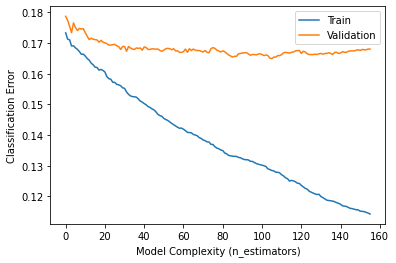

In [ ]:
import matplotlib.pyplot as plt

results = model.evals_result()
train_error = results["validation_0"]["error"]
val_error = results["validation_1"]["error"]

plt.plot(train_error, label="Train")
plt.plot(val_error, label="Validation")
plt.ylabel("Classification Error")
plt.xlabel("Model Complexity (n_estimators)")
plt.legend()

In [ ]:
print("검증 정확도", model.score(X_val_encoded, y_val))

print(
    classification_report(
        y_val, model.predict(X_val_encoded, iteration_range=(0, model.best_iteration))
    )
)

검증 정확도 0.8350136401375875
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      6416
           1       0.72      0.51      0.60      2015

    accuracy                           0.83      8431
   macro avg       0.79      0.72      0.75      8431
weighted avg       0.83      0.83      0.82      8431



## 👏 마무리
#### 이번 노트에서는 
- 대표적인 앙상블 기법인 Boosting 기법에 대해 배웠습니다.
- Bagging과 Boosting의 차이에 대해 배웠습니다.
- 대표적인 Boosting 알고리즘인 Adaboost와 Gradient Boosting의 개념과 차이에 대해 배웠습니다. 
- XGBoost의 여러 가지 파라미터를 배우고 구현해보았습니다.  
<br></br>

#### 학습 후 아래 질문에 답해보세요

1. Bagging과 Boosting의 차이는 무엇인가요? 
2. Adaboost와 Gradient Boosting의 차이는 무엇인가요?
3. Gradient Boosting을 구현한 라이브러리는 어떤 것들이 있나요? 
4. XGBoost에서 과적합을 방지하기 위한 방법은 무엇이 있나요?


# References
- [Bagging vs Boosting](https://www.kaggle.com/code/prashant111/bagging-vs-boosting/notebook)
- [Single estimator versus bagging: bias-variance decomposition](https://scikit-learn.org/stable/auto_examples/ensemble/plot_bias_variance.html#sphx-glr-auto-examples-ensemble-plot-bias-variance-py)
- [Understanding AdaBoost](https://towardsdatascience.com/understanding-adaboost-2f94f22d5bfe)
- Friedman, Jerome H. "Greedy function approximation: a gradient boosting machine." Annals of statistics (2001): 1189-1232.
- [Gradient Boosting Diagram](https://www.researchgate.net/profile/Duruo-Huang-2/publication/342270212/figure/fig2/AS:903756141056000@1592483663026/Schematic-diagram-of-the-gradient-boosted-regression-tree.png)
- [Monotonic Constraint](https://xgboost.readthedocs.io/en/latest/tutorials/monotonic.html)
- [DART](https://xgboost.readthedocs.io/en/latest/tutorials/dart.html)
- [XGBoost Parameters](https://xgboost.readthedocs.io/en/latest/parameter.html)
- [Avoid Overfitting By Early Stopping With XGBoost In Python](https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/)
- 데이터가 뛰어노는 AI 놀이터, 캐글 상위 랭킹 진입을 위한 필살기 (가도와키 다이스케, 사카타 류지, 호사카 게이스케, 히라마쓰 유지 저/대니얼WJ )